<span style="color:red">If possible, provide feedback. Questions are in red.</span>

# Filtering
Simulate a simple EEG signal:

# Signal processing and analysis of human brain potentials (EEG) [Exercise 2]
## Overview
In this exercise we will learn a lot about filters.

## Simulate a simple EEG signal
We start out with a simple signal:

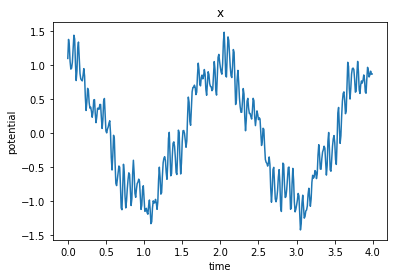

In [273]:
from numpy import cos, sin, pi,  arange
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

sample_rate = 100.0 # samples / sec
nsamples = 400 
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

# Plot the signal against time.
plt.plot(t,x)
plt.title('x')
plt.ylabel('potential')
plt.xlabel('time')
plt.show()


## Transform to fourier space
We will run the FFT algorithm and plot the magnitude response ($log10(abs(fft(x))))$).

<ipython-input-372-95a59f2e9392>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(tf), 2.0/nsamples * xf_mag[0:nsamples//2])


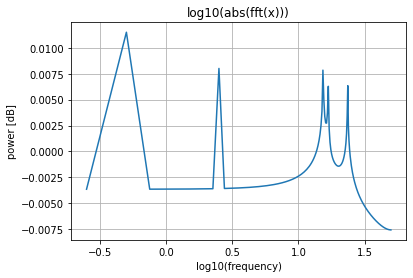

In [372]:
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt


nsamples = 400 # Number of sample points


sample_rate = 100.0


t = arange(nsamples) / sample_rate


x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
xf = fft(x)
xf_mag = np.log10(abs(fft(x)))

tf = np.linspace(0.0, 1.0/(2.0/sample_rate), nsamples//2)
plt.plot(np.log10(tf), 2.0/nsamples * xf_mag[0:nsamples//2])
plt.title('log10(abs(fft(x)))')
plt.ylabel('power [dB]')
plt.xlabel('log10(frequency)')
plt.grid()
plt.show()

## A simple filter
a very simple frequency filter is to set the unwanted amplitude of the fourier components to something close to zero.  We have to be a tad careful not to remove the phase information though.

split the complex fourier result into *angle* and *magnitude* 

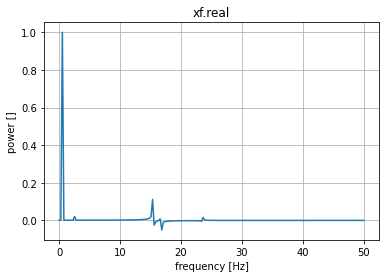

In [311]:
magnitude = xf.real
angle = xf.imag

plt.plot(tf, 2.0/nsamples * magnitude[0:nsamples//2])
plt.title('xf.real')
plt.ylabel('power []')
plt.xlabel('frequency [Hz]')
plt.grid()
plt.show()

set the respective magnitudes to zero (we start with a lowpass filter: `magnitude[30:370] = 0`)

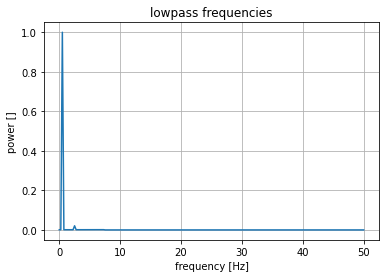

In [312]:
magnitude[30:370] = 0
plt.plot(tf, 2.0/nsamples * magnitude[0:nsamples//2])
plt.title('lowpass frequencies')
plt.ylabel('power []')
plt.xlabel('frequency [Hz]')
plt.grid()
plt.show()

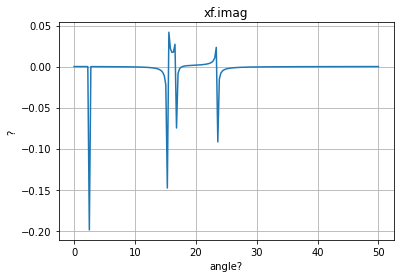

In [313]:
plt.plot(tf, 2.0/nsamples * angle[0:nsamples//2])
plt.title('xf.imag')
plt.ylabel('?')
plt.xlabel('angle?')
plt.grid()
plt.show()

<span style="color:red">Question about above: tanh for angle needed?</span>

combine angle and magnitude back to a complex fourier coefficient ($m*e^(1j*ang)$)

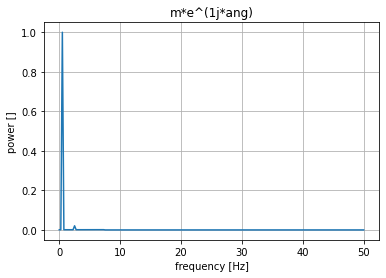

In [314]:
filtered_signal = magnitude*np.exp(1j*angle)
plt.plot(tf, 2.0/nsamples * abs(filtered_signal)[0:nsamples//2])
plt.title('m*e^(1j*ang)')
plt.ylabel('power []')
plt.xlabel('frequency [Hz]')
plt.grid()
plt.show()

apply the inverse FFT and plot the signal with what you started out

/home/chrei/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


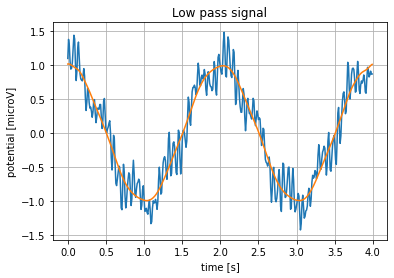

In [317]:
x_lowpass = ifft(filtered_signal)

plt.plot(t,x)
plt.title('Low pass signal')
plt.plot(t,x_lowpass)
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.grid()
plt.show()

<span style="color:red">Question about warning above: how to avoid losing imaginary part?</span>

## Highpass instead of lowpass
Repeat the steps from above, but this time, remove the low frequency components

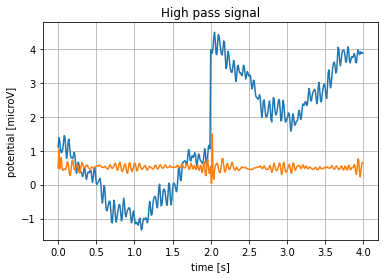

In [368]:
xf = fft(x)
angle = xf.imag
magnitude = xf.real
magnitude[0:50] = 0
filtered_signal = magnitude*np.exp(1j*angle)
x_ifft = ifft(filtered_signal)
plt.plot(t,x)
plt.plot(t,abs(x_ifft))
plt.title('High pass signal')
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.grid()
plt.show()

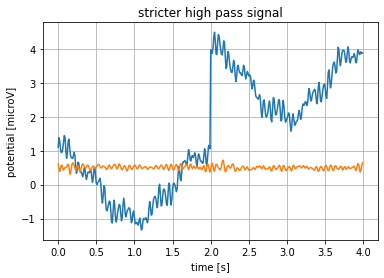

In [370]:
xf = fft(x)
angle = xf.imag
magnitude = xf.real
magnitude[0:300] = 0
filtered_signal = magnitude*np.exp(1j*angle)
x_ifft = ifft(filtered_signal)
plt.plot(t,x)
plt.plot(t,abs(x_ifft))
plt.title('stricter high pass signal')
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.grid()
plt.show()

<span style="color:red">Question about above: why is the average of the high pass signal around 0.5 and not 0?</span>

## What happens to the frequency and time response if we add "artefacts"?
 Add a DC-offset (a step-function) starting from `x[200:]` and investigate the fourier space. Filter it again (low or high pass) and transfer it back to the time domain and investigate the signal around the spike.

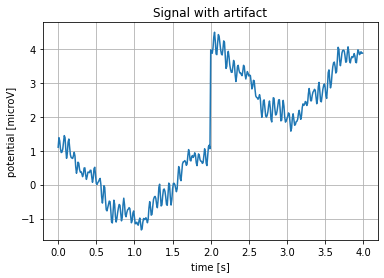

In [319]:
x_with_step = x
x_with_step[200:] = x_with_step[200:] +3

plt.plot(t,x_with_step)
plt.title('Signal with artifact')
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.grid()
plt.show()

### Highpass with step

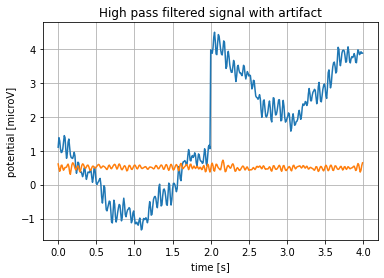

In [320]:
xf = fft(x_with_step)
magnitude = xf.real
angle = xf.imag

# highpass
magnitude[0:300] = 0

filtered_signal = magnitude*np.exp(1j*angle)
x_ifft = ifft(filtered_signal)

plt.plot(t,x_with_step)
plt.plot(t,abs(x_ifft))
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.title('High pass filtered signal with artifact')
plt.grid()
plt.show()

### Lowpass with step

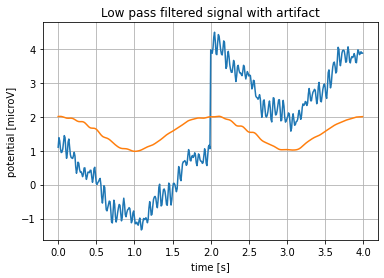

In [321]:
xf = fft(x_with_step)
magnitude = xf.real
angle = xf.imag

# highpass
magnitude[30:400] = 0

filtered_signal = magnitude*np.exp(1j*angle)
x_ifft = ifft(filtered_signal)

plt.plot(t,x_with_step)
plt.title('Low pass filtered signal with artifact')
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.plot(t,abs(x_ifft))
plt.grid()
plt.show()

 ## Impulse Response Function
 To get a bit deeper understanding of what is going on, have a look at the fourier transform of a new impulse signal (e.g. 1:400 => 0. and 200 => 1.).

/home/chrei/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


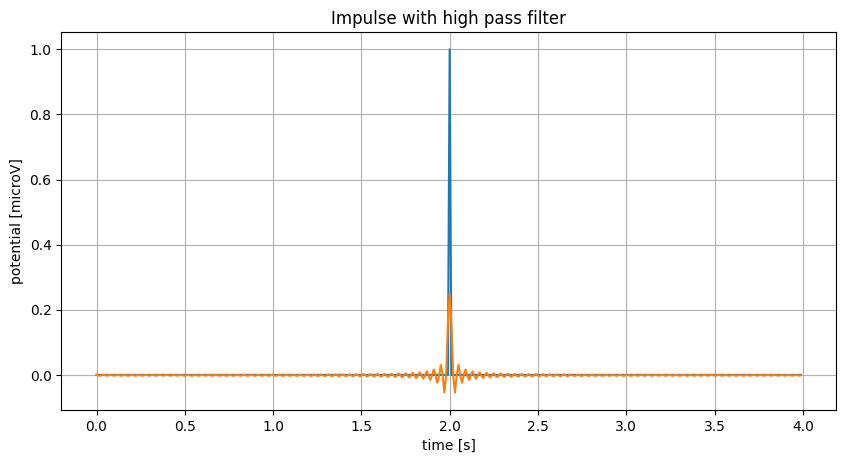

In [322]:
x_impulse = np.zeros(400)
x_impulse[200] = 1

xf = fft(x_impulse)
magnitude = xf.real
angle = xf.imag

# highpass
magnitude[0:300] = 0

filtered_signal = magnitude*np.exp(1j*angle)
x_ifft = ifft(filtered_signal)

fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t,x_impulse)
plt.plot(t,(x_ifft))
plt.grid()
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.title('Impulse with high pass filter')
plt.show()

/home/chrei/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


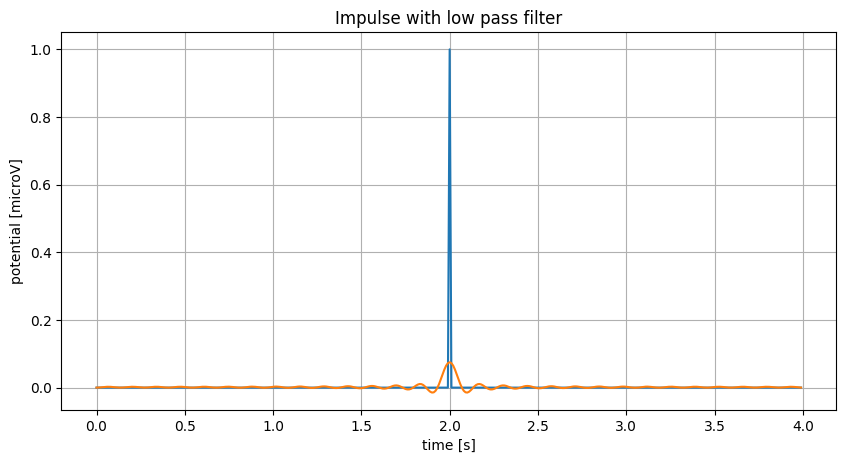

In [323]:
x_impulse = np.zeros(400)
x_impulse[200] = 1

xf = fft(x_impulse)
magnitude = xf.real
angle = xf.imag

# highpass
magnitude[30:400] = 0

filtered_signal = magnitude*np.exp(1j*angle)
x_ifft = ifft(filtered_signal)

fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t,x_impulse)
plt.plot(t,(x_ifft))
plt.grid()
plt.ylabel('potential [microV]')
plt.xlabel('time [s]')
plt.title('Impulse with low pass filter')
plt.show()

 What do you observe? 
 oscillations around the impulse with highest magnitude at impulse
 
 Why would we see ringing if we put most of the coefficients to 0?
 <span style="color:red"> Not sure: Because all frequencies are needed to model the impulse properly. The more frequencies are missing, the greater the error in form of ringing.</span>


## Filtering EEG data
Usually we would not built our own filters - but understanding the properties is still very important! We will load our data from last time again:

In [350]:
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib
import ccs_eeg_utils

bids_root = "../local/bids"
subject_id = '002'


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading ../local/bids/sub-002/ses-P3/eeg/sub-002_task-P3_eeg.fdt
Reading events from ../local/bids/sub-002/ses-P3/eeg/sub-002_ses-P3_task-P3_events.tsv.
Reading channel info from ../local/bids/sub-002/ses-P3/eeg/sub-002_ses-P3_task-P3_channels.tsv.
Reading 0 ... 414719  =      0.000 ...   404.999 secs...


<ipython-input-350-27af3624bb40>:13: RuntimeWarning: Did not find any coordsystem.json associated with sub-002_ses-P3_task-P3.

The search_str was "../local/bids/sub-002/**/sub-002_ses-P3*coordsystem.json"
  raw = read_raw_bids(bids_path)


<RawEEGLAB | sub-002_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.5 MB, data loaded>

**T:** Choose the channel "Pz", plot the channel (same as previous HW)

In [351]:
raw.pick_channels(["Pz"])

<RawEEGLAB | sub-002_task-P3_eeg.fdt, 1 x 414720 (405.0 s), ~3.2 MB, data loaded>

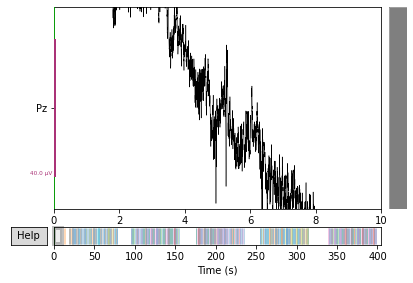

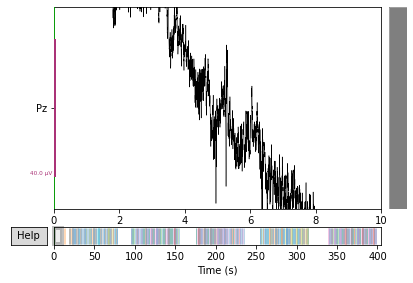

In [352]:
raw.plot()

**T:** Plot the fourier space using `raw.plot_psd`

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-353-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


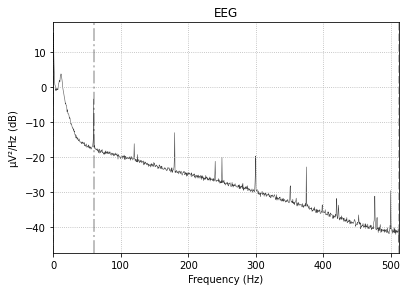

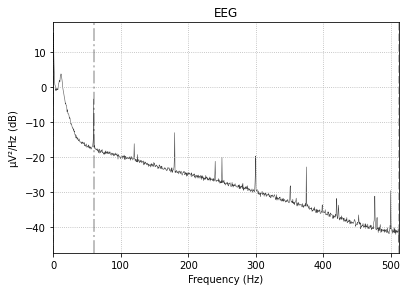

In [353]:
raw.plot_psd()

**T:** Now we filter using `raw.filter()`, specify a highpass of 0.5Hz and a lowpass of 50Hz. Plot the fourier spectrum again.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-354-4342bbac8c2c>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  band_pass.plot_psd()


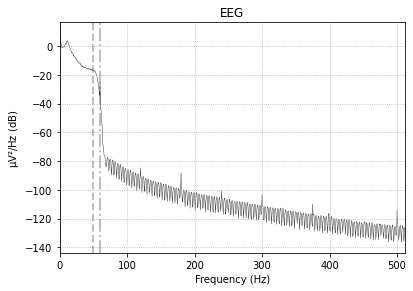

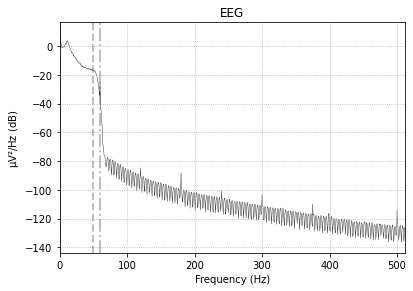

In [354]:
band_pass = raw.copy().filter(l_freq=0.5, h_freq=50)
band_pass.plot_psd()

<span style="color:red"> I expected everything <0.5 and >50Hz to be zero, but it's not</span>

**T:** Plot the channel again, did the filter work as indented?

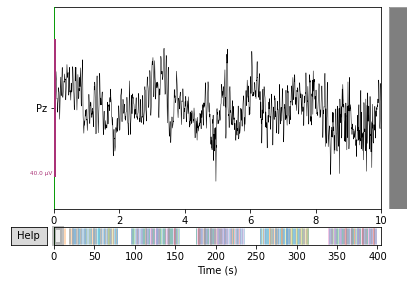

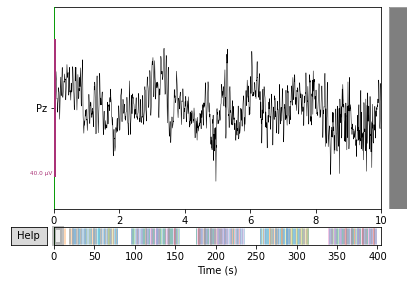

In [357]:
band_pass.plot()

**A:** As intended, the slow drift to lower potentials and the highest frequencies are gone.

**Bonus** Compare the ERP with and without filtering.<span style="color:red"> what does compare mean?</span>


**Bonus** use "invalid" filter settings - HP up to 2-5Hz, lowpass until 10-20Hz. I say invalid here, because usually with such ranges, you would filter out results that you are actually interested in.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1691 samples (1.651 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-360-7f84d7a7de41>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  invalid_bandpass_5_10.plot_psd()


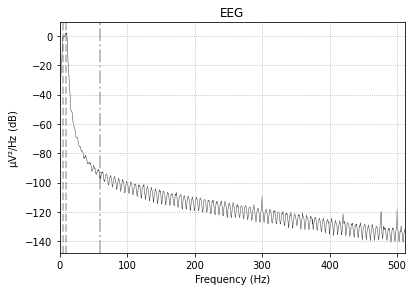

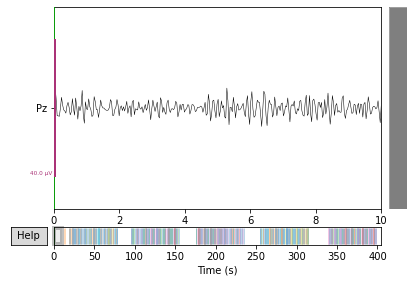

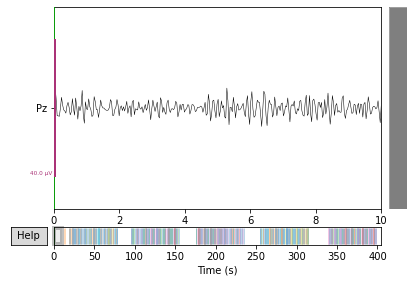

In [360]:
invalid_bandpass_5_10 = raw.copy().filter(l_freq=5, h_freq=10)
invalid_bandpass_5_10.plot_psd()
invalid_bandpass_5_10.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 9 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 9.00
- Lower transition bandwidth: 2.25 Hz (-6 dB cutoff frequency: 7.88 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1503 samples (1.468 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-361-0edbbd471f2b>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  invalid_bandpass_9_10.plot_psd()


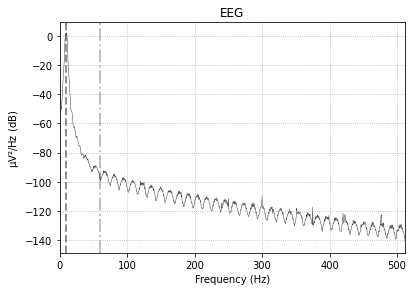

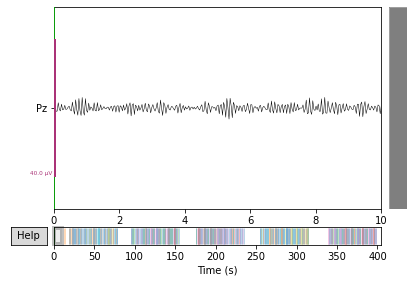

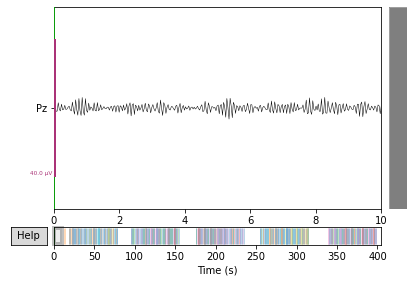

In [361]:
invalid_bandpass_9_10 = raw.copy().filter(l_freq=9, h_freq=10)
invalid_bandpass_9_10.plot_psd()
invalid_bandpass_9_10.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1691 samples (1.651 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-362-3feb3df45296>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  invalid_bandpass_2_20.plot_psd()


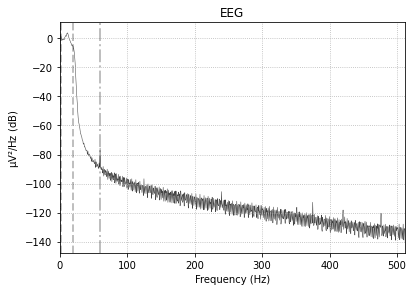

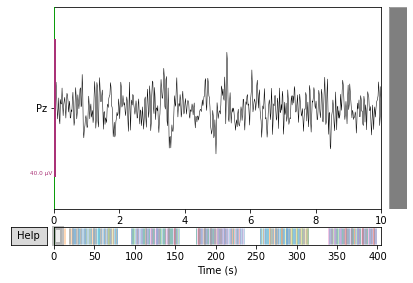

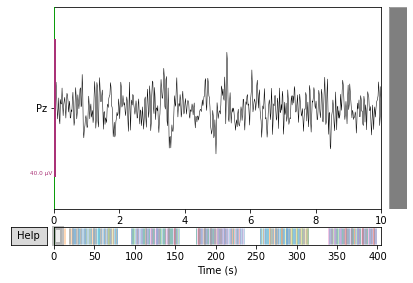

In [362]:
invalid_bandpass_2_20 = raw.copy().filter(l_freq=2, h_freq=20)
invalid_bandpass_2_20.plot_psd()
invalid_bandpass_2_20.plot()



## Bonus: Electrical Artefacts
Too late to fix the lecture, but instead of notch filtering 50/60Hz artefacts, one can also try to regress it out in smarter ways. A good tool for this is *Zap_Line* with a python implementation here: https://github.com/nbara/python-meegkit/. There are also several robust detrending methods, which could potentially replace highpass filters in the future. But more work needs to be invested to see how results compare. These methods are not (yet) common.